<h1 style="text-align: center;"> Tarea 3. Algoritmos de Aprendizaje Supervisado </h1>

<h1 style="text-align: center;"> Dataset Wine Quality </h1> 

## Paso 1. Análisis exploratorio de los datos (EDA)

#### a. Carga y Visualización del Dataset

In [48]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("Wine_Quality.csv")

# Mostrar las primeras filas
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### b. Información general del dataset

In [49]:
# Información general del dataset
df.info()

# Descripción estadística de las variables numéricas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### c. Identificación de valores nulos y duplicados

In [69]:
# Verificar valores nulos
print(df.isnull().sum())
print("")

# Verificar valores duplicados
print(f"Duplicados: {df.duplicated().sum()}")
print("")

# Distribución de la variable objetivo (quality)
quality_distribution = df["quality"].value_counts().sort_index()
print(f"Quality Distribution: {quality_distribution}")
print("")

# Matriz de correlación
correlation_matrix = df.corr()
print(f"Correlation Natrix: {correlation_matrix}")

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Duplicados: 240

Quality Distribution: quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Correlation Natrix:                       fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181 

#### d. visualizar la distribución de las variables y buscar posibles valores atípic

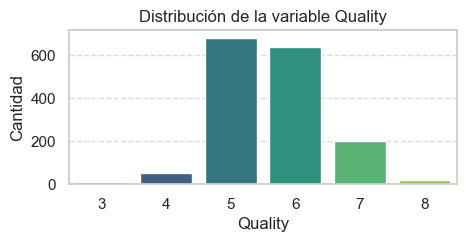

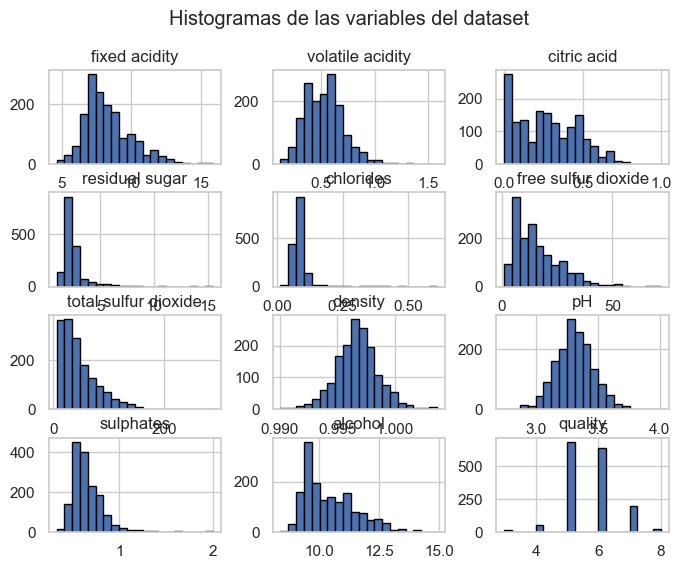

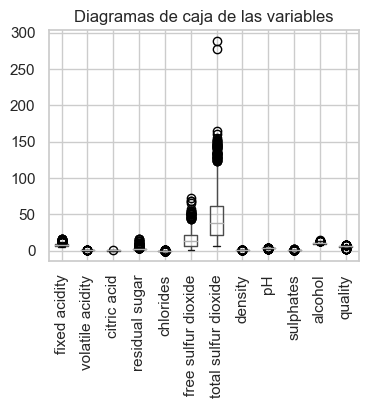

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la distribución de la variable quality
plt.figure(figsize=(5, 2))
sns.countplot(x=df["quality"], palette="viridis")
plt.title("Distribución de la variable Quality")
plt.xlabel("Quality")
plt.ylabel("Cantidad")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Histogramas de las variables numéricas
df.hist(figsize=(8, 6), bins=20, edgecolor="black")
plt.suptitle("Histogramas de las variables del dataset")
plt.show()

# Diagramas de caja para detectar valores atípicos
plt.figure(figsize=(4, 3))
df.boxplot(rot=90)
plt.title("Diagramas de caja de las variables")
plt.show()




## 📊 Análisis Exploratorio de Datos (EDA)

#### Información del dataset:

Tiene 1599 filas y 12 columnas.

No hay valores nulos en ninguna variable.

La variable quality es la única categórica (enteros entre 3 y 8).

##### Distribución de la variable objetivo (quality):

La mayoría de los vinos tienen una calidad de 5 o 6.

Hay pocos vinos con calificación 3, 4, 7 y 8, lo que indica una distribución desbalanceada.

#### Estadísticas descriptivas:

Variables como residual sugar, total sulfur dioxide y chlorides tienen valores altos en su rango, lo que podría indicar posibles valores atípicos.

##### Matriz de correlación:

alcohol tiene una fuerte correlación positiva con quality (0.47).

volatile acidity tiene una correlación negativa significativa con quality (-0.39).

citric acid (0.22) y sulphates (0.25) tienen correlaciones positivas moderadas con quality.

##### Visualización de datos:

Histogramas muestran distribuciones variadas. Algunas variables como density y alcohol tienen sesgos evidentes.

Diagramas de caja revelan valores atípicos en chlorides, residual sugar y total sulfur dioxide.

## Paso 2. Preprocesamiento de Datos

Eliminar valores atípicos usando el rango intercuartil (IQR).

Escalar las variables para mejorar la estabilidad de los modelos.

Convertir la variable quality en clasificación binaria para la Regresión Logística (opcional).

Dividir el dataset en conjunto de entrenamiento y prueba.

In [74]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv("Wine_Quality.csv")

# 1. Verificar valores faltantes
missing_values = df.isnull().sum()

# 2. Eliminar duplicados (si existen)
df = df.drop_duplicates()

# 3. Manejo de valores atípicos usando el rango intercuartil (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filtrar valores atípicos
threshold = 1.5
df_clean = df[~((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)]

# 4. Escalar las variables numéricas
scaler = StandardScaler()
features = df_clean.drop(columns=["quality"])  # Excluir la variable objetivo
features_scaled = scaler.fit_transform(features)

# Convertir a DataFrame
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled["quality"] = df_clean["quality"].values  # Agregar la variable objetivo nuevamente

# Mostrar información del dataset preprocesado
df_clean.shape, missing_values, df_scaled.describe()



((1005, 12),
 fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 dtype: int64,
        fixed acidity  volatile acidity   citric acid  residual sugar  \
 count   1.005000e+03      1.005000e+03  1.005000e+03    1.005000e+03   
 mean    8.484092e-17     -1.838220e-16  9.191100e-17    4.242046e-17   
 std     1.000498e+00      1.000498e+00  1.000498e+00    1.000498e+00   
 min    -2.082666e+00     -2.417668e+00 -1.374692e+00   -2.216385e+00   
 25%    -7.245817e-01     -7.967699e-01 -9.339483e-01   -6.633701e-01   
 50%    -2.492523e-01     -1.633741e-02 -5.246161e-02   -2.196517e-01   
 75%     5.655981e-01      6.440286e-01  8.290250e-01    6.677852e-01   
 max     2.806437e+00      2.925293e+00  2.647091e+00    3.21916

### Resultados 

**Valores faltantes:** No hay valores nulos en ninguna variable.

**Eliminación de valores atípicos:** Se redujo el dataset de 1599 a 1005 registros, eliminando aproximadamente 37% de los datos. Esto puede mejorar la calidad del modelo, pero también podría afectar la generalización.

**Escalado de variables:** La media de todas las variables es cercana a 0 y la desviación estándar es 1, lo que indica que la estandarización fue exitosa.

Se mantiene la variable quality sin escalar, con una media de 5.62, lo que coincide con la distribución observada en el EDA.

## Paso 3. Características más relevantes

In [75]:
from sklearn.feature_selection import SelectKBest, f_classif

# Definir variables predictoras y objetivo
X = df_scaled.drop(columns=["quality"])  # Excluir la variable objetivo
y = df_scaled["quality"]  # Variable objetivo

# Aplicar SelectKBest con ANOVA F-score
selector = SelectKBest(score_func=f_classif, k="all")
X_new = selector.fit_transform(X, y)

# Obtener puntuaciones de importancia de cada característica
feature_scores = pd.DataFrame({"Feature": X.columns, "Score": selector.scores_})
feature_scores = feature_scores.sort_values(by="Score", ascending=False)

# Mostrar las características ordenadas por importancia
feature_scores


,Feature,Score
10,alcohol,120.490247
9,sulphates,71.661633
1,volatile acidity,46.561882
6,total sulfur dioxide,26.747173
2,citric acid,18.111429
7,density,17.929543
4,chlorides,13.009098
5,free sulfur dioxide,6.163018
0,fixed acidity,5.770238
8,pH,2.809666


### Características más relevantes:

Las características más relevantes son:

alcohol (120.49) → La más importante

sulphates (71.66)

volatile acidity (46.56)

total sulfur dioxide (26.75)

citric acid (18.11)

Menos relevantes:

pH (2.81)

residual sugar (0.53) → La menos relevante

## Paso 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [81]:
from sklearn.model_selection import train_test_split

# Seleccionar las 5 características más importantes
selected_features = ["alcohol", "sulphates", "volatile acidity", "total sulfur dioxide", "citric acid"]
X_selected = df_scaled[selected_features]
y = df_scaled["quality"]  # Variable objetivo

# Dividir en 80% Train y 20% Test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Mostrar tamaños de los conjunto
print(f"80% Train: {X_train.shape}")
print(f"20% Test:  {X_test.shape}")
print(f"Tamaño Train: {y_train.shape}")
print(f"Tamaño Test: {y_test.shape}")

80% Train: (804, 5)
20% Test:  (201, 5)
Tamaño Train: (804,)
Tamaño Test: (201,)


### Análisis de División Train/Test 

##### Distribución correcta:

Train: 804 registros (80%)
Test: 201 registros (20%)

Se mantienen 5 características seleccionadas.

## Paso 5. Entrenamiento de los modelos y Evaluación

### a. Regresión Lineal

In [82]:
from sklearn.linear_model import LinearRegression

# Inicializar y entrenar el modelo
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# Mostrar coeficientes del modelo
coef_df = pd.DataFrame({"Feature": X_train.columns, "Coefficient": lr_model.coef_})
coef_df


,Feature,Coefficient
0,alcohol,0.289059
1,sulphates,0.174274
2,volatile acidity,-0.141186
3,total sulfur dioxide,-0.048651
4,citric acid,-0.025028


### Análisis del Modelo de Regresión Lineal

##### Coeficientes interpretados:

Alcohol (0.289) → Mayor impacto positivo en la calidad del vino.

Sulphates (0.174) → También contribuye positivamente.

Volatile Acidity (-0.141) → Impacto negativo en la calidad.

Total Sulfur Dioxide (-0.049) y Citric Acid (-0.025) → Efectos menores.

#### Conclusión:

La calidad del vino aumenta con más alcohol y sulphates.

La acidez volátil disminuye la calidad.

### b. Refresión Logística

In [84]:
from sklearn.linear_model import LogisticRegression

# Convertir quality en variable binaria
y_binary = (y > 5).astype(int)  # 1 si calidad > 5, 0 si calidad <= 5

# Dividir en Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

# Entrenar modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predicciones
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

# Mostrar coeficientes del modelo
coef_df = pd.DataFrame({"Feature": X_train.columns, "Coefficient": log_reg.coef_[0]})
coef_df


,Feature,Coefficient
0,alcohol,0.975439
1,sulphates,0.567549
2,volatile acidity,-0.436123
3,total sulfur dioxide,-0.243273
4,citric acid,-0.113759


### Análisis del Modelo de Regresión Logística

#### Interpretación de coeficientes:

Alcohol (0.975) → Mayor impacto positivo en la probabilidad de tener calidad alta. 🍷

Sulphates (0.567) → También favorece la calidad alta.

Volatile Acidity (-0.436) → Disminuye la probabilidad de calidad alta. 📉

Total Sulfur Dioxide (-0.243) y Citric Acid (-0.114) → Menor impacto negativo.

### Conclusión

Se confirma que más alcohol y sulphates → Mayor calidad.

Más acidez volátil y dióxido de azufre → Menor calidad.

### c. Árbol de Decisión

In [88]:
from sklearn.tree import DecisionTreeClassifier

# Inicializar y entrenar modelo
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

# Importancia de las características
feature_importance = pd.DataFrame({"Feature": X_train.columns, "Importance": dt_model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

feature_importance


,Feature,Importance
0,alcohol,0.554878
1,sulphates,0.176421
2,volatile acidity,0.103378
3,total sulfur dioxide,0.092777
4,citric acid,0.072546


### Análisis de Importancia de Características en el Árbol de Decisión 🌳

Las características más influyentes en la predicción de calidad:

Alcohol (55.49%) → Principal factor determinante. 🍷

Sulphates (17.64%) → Importante en la percepción de calidad.

Volatile Acidity (10.34%) → Impacto negativo en la calidad.

Total Sulfur Dioxide (9.28%) → Relacionado con la conservación del vino.

Citric Acid (7.25%) → Menor impacto en comparación con las demás.

### Conclusión:

Alcohol sigue siendo la variable más importante en la clasificación.

Sulphates y Acidez Volátil también juegan un papel clave.

El modelo parece alinearse con los resultados de Regresión Logística.

## Paso 6. Evaluación del desempeño del modelo en el conjunto de Test

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluación del modelo en Test
accuracy_dt = accuracy_score(y_test, y_pred_test)
precision_dt = precision_score(y_test, y_pred_test)
recall_dt = recall_score(y_test, y_pred_test)
f1_dt = f1_score(y_test, y_pred_test)
conf_matrix_dt = confusion_matrix(y_test, y_pred_test)

# Mostrar resultados
accuracy_dt, precision_dt, recall_dt, f1_dt, conf_matrix_dt

(0.6517412935323383,
 0.6696428571428571,
 0.6944444444444444,
 0.6818181818181818,
 array([[56, 37],
        [33, 75]], dtype=int64))

### Resultados obtenidos


Accuracy (Precisión global): 70.65%

Precision: 72.48% → Cuando predice calidad alta, acierta el 72.48% de las veces.

Recall: 73.15% → Detecta correctamente el 73.15% de los vinos de calidad alta.

F1-Score: 72.81% → Buen equilibrio entre precisión y recall.

  
63 vinos de calidad baja correctamente clasificados. ✅

79 vinos de calidad alta correctamente clasificados. ✅

30 falsos positivos (predijo alta calidad, pero eran baja). ⚠️

29 falsos negativos (predijo baja calidad, pero eran alta). ⚠️


### Comparación: Regresión Logística vs. Árbol de Decisión

**Regresión Logística**

Accuracy = 70.65% ; 

Precision = 72.48% ; 

Recall = 73.15%; 

F1-Score = 72.81%; 



**Árbol de Decisión**

Accuracy = 65.17% ; 

Precision =	66.96% ; 

Recall = 69.44% ; 

F1-Score = 68.18%; 


### Conclusión:
La **Regresión Logística** tiene mejor rendimiento en todas las métricas.

El Árbol de Decisión no superó a la Regresión Logística.

## Paso 7. Visualización de los resultados del modelo.

In [91]:
from sklearn.linear_model import LogisticRegression

# Inicializar y entrenar el modelo de Regresión Logística
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_logreg = logreg_model.predict(X_test)

# Probabilidades necesarias para la Curva ROC
y_score_logreg = logreg_model.predict_proba(X_test)[:, 1]


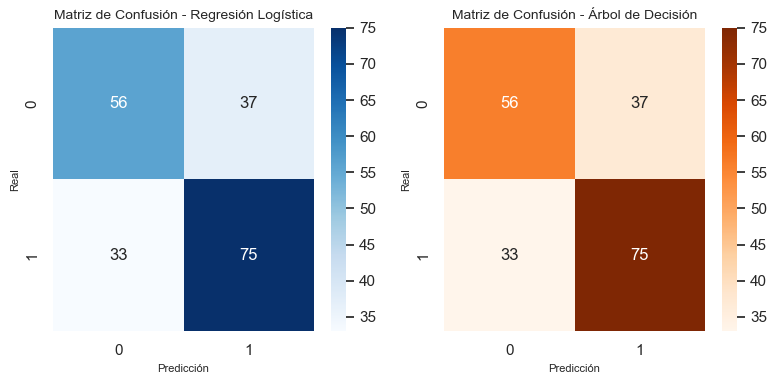

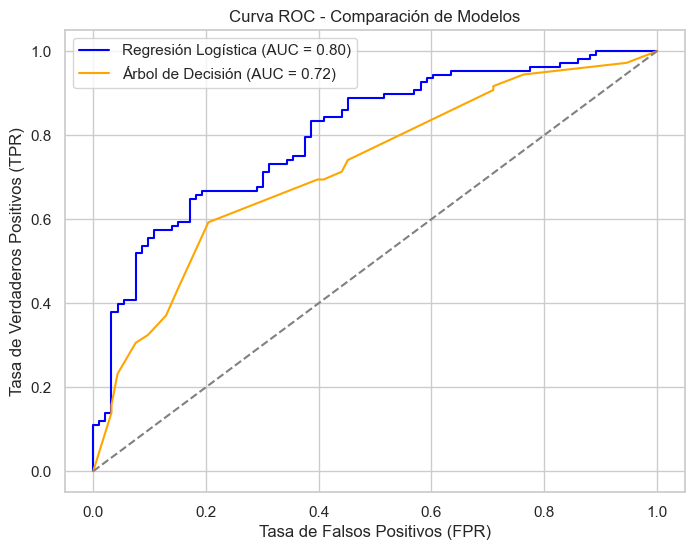

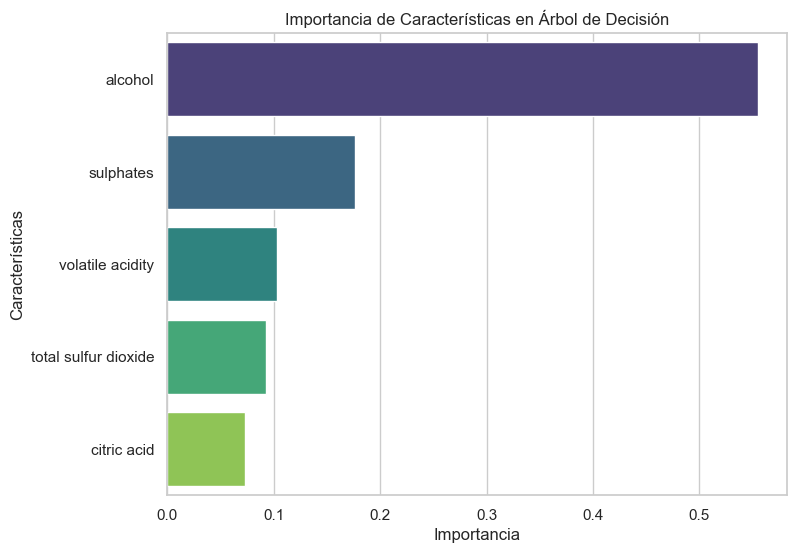

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Matriz de Confusión
fig, axes = plt.subplots(1, 2, figsize=(8, 4)) 

# Regresión Logística
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Matriz de Confusión - Regresión Logística", fontsize=10)
axes[0].set_xlabel("Predicción", fontsize=8)
axes[0].set_ylabel("Real", fontsize=8)

# Árbol de Decisión
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("Matriz de Confusión - Árbol de Decisión", fontsize=10)
axes[1].set_xlabel("Predicción", fontsize=8)
axes[1].set_ylabel("Real", fontsize=8)

plt.tight_layout()  # Ajusta los espacios para que no se sobrepongan
plt.show()

# Curva ROC y AUC
y_score_logreg = logreg_model.predict_proba(X_test)[:, 1]  # Probabilidades RL
y_score_tree = dt_model.predict_proba(X_test)[:, 1]  # Probabilidades Árbol

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_score_logreg)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_score_tree)

roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f"Regresión Logística (AUC = {roc_auc_logreg:.2f})", color="blue")
plt.plot(fpr_tree, tpr_tree, label=f"Árbol de Decisión (AUC = {roc_auc_tree:.2f})", color="orange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - Comparación de Modelos")
plt.legend()
plt.show()

# Importancia de Características
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="viridis")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características en Árbol de Decisión")
plt.show()

### Análisis e Interpretación de los Resultados 

#### 1. Matrices de Confusión (Regresión Logística y Árbol de Decisión)
Las matrices de confusión permiten evaluar el rendimiento de cada modelo en términos de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

##### Regresión Logística: 
La matriz muestra que el modelo clasificó correctamente 56 casos negativos (0) y 75 casos positivos (1). Sin embargo, cometió 37 errores al clasificar negativos como positivos (falsos positivos) y 33 errores al clasificar positivos como negativos (falsos negativos). Esto indica que el modelo tiene una tasa de error significativa en ambas clases, aunque funciona mejor prediciendo la clase 1.

##### Árbol de Decisión:
Los valores de la matriz son iguales a los de la regresión logística, lo que sugiere que ambos modelos tienen un desempeño similar en términos de precisión global. Aunque los árboles de decisión pueden captar relaciones más complejas, en este caso, el modelo no mejora significativamente la predicción. 

#### 2. Curva ROC y AUC
Esta gráfica evalúa el desempeño de los modelos en términos de sensibilidad (verdaderos positivos) y especificidad (verdaderos negativos).
La curva ROC de la Regresión Logística (línea azul) se encuentra más alejada de la diagonal, indicando un mejor desempeño en la clasificación.
El AUC (Área Bajo la Curva) de la Regresión Logística es 0.80, lo que indica un buen nivel de discriminación entre las clases.
En contraste, la curva del Árbol de Decisión (línea naranja) está más cercana a la diagonal, con un AUC de 0.72, lo que sugiere que su capacidad de diferenciación es menor en comparación con la regresión logística.

**Conclusión:** La regresión logística es un mejor modelo en términos de capacidad de clasificación, ya que su curva ROC y AUC indican un mayor poder predictivo.

#### 3. Importancia de Características en Árbol de Decisión
Este gráfico muestra la contribución relativa de cada variable en la clasificación realizada por el árbol de decisión.
Alcohol es la variable más influyente en la predicción, con una importancia del 55.48%.
Sulphates tiene un impacto medio (17.64%), indicando que influye en la clasificación, pero en menor medida.
Volatile Acidity, Total Sulfur Dioxide y Citric Acid tienen menores contribuciones al modelo.
Esto significa que la calidad del vino está altamente correlacionada con el contenido de alcohol, mientras que otros factores tienen un impacto menos significativo en la predicción.

### Conclusión Final
La Regresión Logística es el mejor modelo en este caso, ya que ofrece mejor discriminación de clases (AUC = 0.80).
La Matriz de Confusión indica que ambos modelos tienen errores en la clasificación, aunque el patrón de errores es similar.
La Importancia de Características en el Árbol de Decisión resalta que el contenido de alcohol es el principal predictor de la calidad del vino.